
# Project: NICS Background Checks, Gun Data and Demographics in the United States (2010-2016)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The FBI's National Instant Criminal Background Check System was instituted to improve the tracking and safety of firearms in the United States. The system is a database of information that tracks the eligibility of gun ownership. This data set tracks the number of checks made and the types across states. One important caveat is that these background checks do not constitute gun purchase or even gun ownership. These number simply mean that a background check was run based on the categories in this data set. There are ways to purchase and acquire guns without a background check. Further some states differ in the frequency of required background checks. Based on these factors, it is not possible to estimate the background checks as a one to one with gun ownership or purchase.



> Research Questions:
> 1.What census variables are positively and negatively correlated with gun ownership per capita for 2010 and 2016? 
> 2.What states have had high growth rate in gun ownership?
> 3.What months and years have the highest gun ownership rate?

In [4]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns

dfcensus = pd.read_csv('U.S. Census Data_v1.csv')
dfgun = pd.read_excel('gun-data.xlsx')

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling


In [40]:
#investigate columns to avoid dealing with external csvs
dfgun.head()
dfcensus.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [41]:
#Inspect Data Types
dfgun.info()
#There are 12485 rows but the only rows that have that consistency are the month and state. The gun category columns do not have the have the same level of consistency.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

The data type is all float, so no data type changes are needed.

In [42]:
dfgun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


While the data chart is helpful for getting some information at a glance. I'd like some visual assistance through the creation of a histogram.

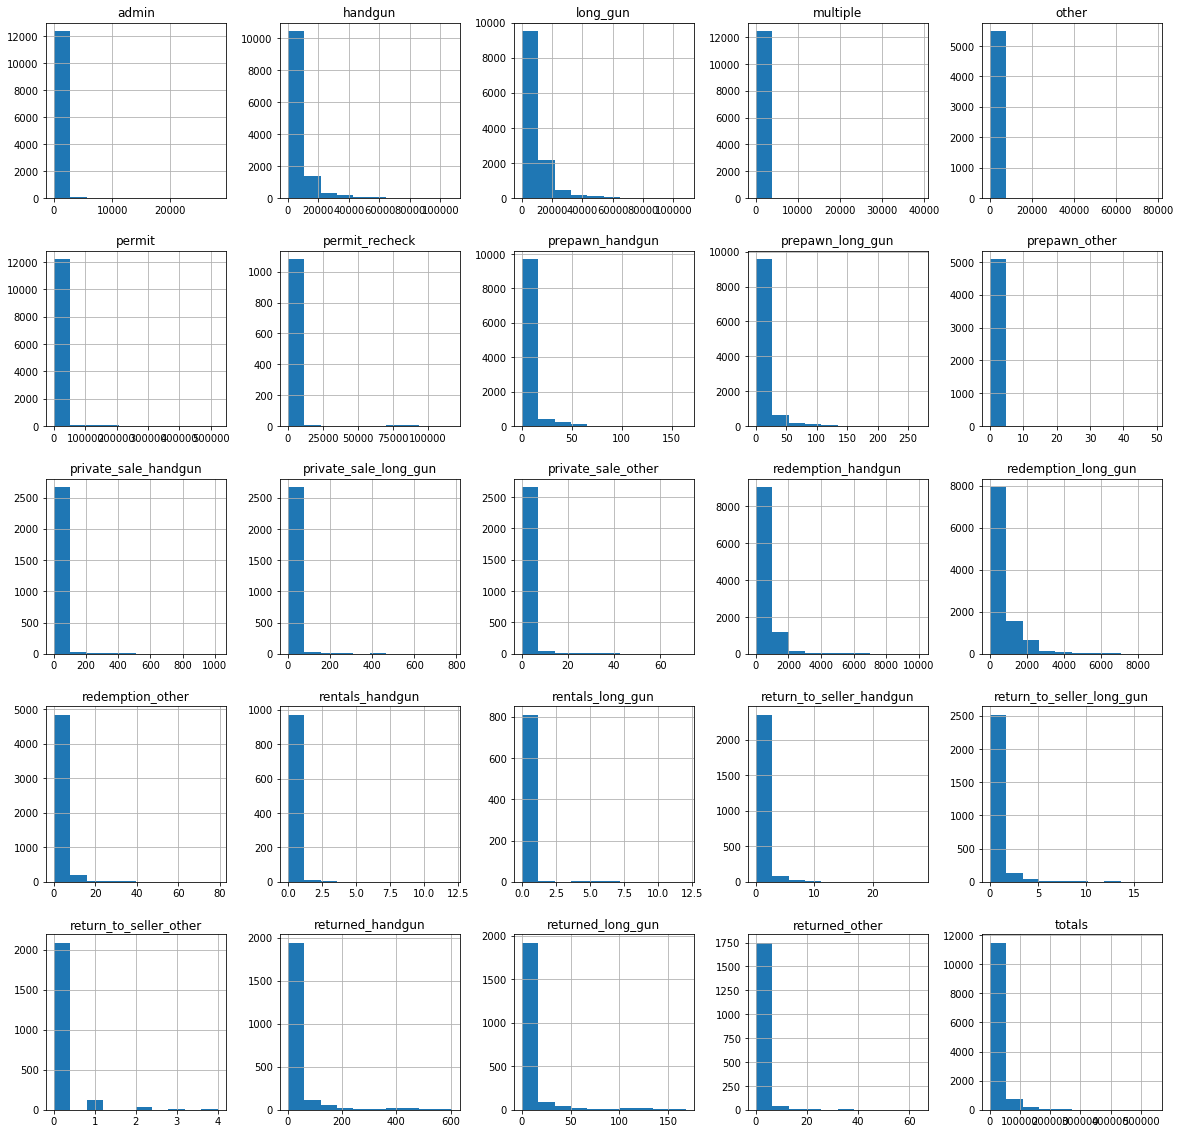

In [43]:
#create histogram but exclude year and month columns
exclude = ['Month', 'Year']
dfgun[dfgun.columns.difference(exclude)].hist(figsize=(20, 20));

In [5]:
#pd.plotting.scatter_matrix(dfgun, figsize=(20,20));

It is interesting to  see all of the data points together but it is a bit challenging to digest without a zoom. So I decided not to include this histogram

In [45]:
dfcensus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 52 columns):
Fact              65 non-null object
Fact Note         16 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

In [46]:
#Look for duplicates in both data sets
sum(dfcensus.duplicated())
#No Duplicates! No need to drop!

0

In [47]:
sum(dfgun.duplicated())
#No Duplicates! No need to drop!

0

Census data is pretty clean and no duplicates need to be dropped.

In [48]:
#check for non-null unique values
dfgun.isnull().sum()
#The type of data collected changed over the years and depending on certain the time frame should be accounted for. 
#Not all states, months and years have data for all gun metric columns
#Maximum number of values 12485, in this case numbers closer to 0 mean greater non-null values

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64


### Data Cleaning 

Only the total number of permits available will be used in the gun column as there is too much variability between state laws to compare between states. Since my research questions do not address changes between types of background checks, I will not change address the 0s and NULL values in many columns. The total fields is already an integer so I do not need to convert the type as integer is the most approriate since it is not possible to check for partial guns. **See multiple background check note and reference this as well.

## > Step 1- Extract year and month based on gun data
## > Step 2 - Drop the Fact Note column as it is not a dimension that can be analyzed.
## > Step 3 - Create list for State. In the gun data set States are listed as a row while in the census data set the states are in columns. This will assist on a merge during data exploration.
## > Step 4 - Convert columns in census data from python objects to float to allow for calculation of guns per capita.
 


In [6]:
#Step 1 - Extract year and month based on gun data
dfgun['month'] = pd.to_datetime(dfgun['month'])
# extract month and day of week from Start Time to create new columns
dfgun['Month'] = dfgun['month'].dt.month
dfgun['Year'] = dfgun['month'].dt.year

#check your work and get unique values to check datetime success
dfgun['Month'].unique()
dfgun['Year'].unique()

#check column header values
dfgun.head(1)

#drop old month column
dfgun =dfgun.drop(['month'],axis=1)

#check column header values
dfgun.head(1)


,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Month,Year
0,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,21.0,...,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,9,2017


In [7]:
#Step 2 - Drop Fact Note column
dfcensus =dfcensus.drop(['Fact Note'],axis=1)
#confirm that nulls are dropped
dfcensus.isnull().sum().any()
#Test should print False

False

In [8]:
#Step 3 - Convert python object to float for census state
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',  
        'Hawaii', 'Idaho', 'Illinois','Indiana', 'Iowa', 'Kansas', 
        'Kentucky', 'Louisiana', 'Maine','Maryland', 'Massachusetts', 
        'Michigan','Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon','Pennsylvania', 
        'Rhode Island', 'South Carolina','South Dakota', 'Tennessee', 'Texas', 'Utah', 
        'Vermont','Virginia', 'Washington', 'West Virginia','Wisconsin', 'Wyoming']
for state in states:
    dfcensus = dfcensus.convert_objects(convert_numeric=True)
    print(dfcensus.dtypes)


Fact               object
Alabama           float64
Alaska            float64
Arizona           float64
Arkansas          float64
California        float64
Colorado          float64
Connecticut       float64
Delaware          float64
Florida           float64
Georgia           float64
Hawaii            float64
Idaho             float64
Illinois          float64
Indiana           float64
Iowa              float64
Kansas            float64
Kentucky          float64
Louisiana         float64
Maine             float64
Maryland          float64
Massachusetts     float64
Michigan          float64
Minnesota         float64
Mississippi       float64
Missouri          float64
Montana           float64
Nebraska          float64
Nevada            float64
New Hampshire     float64
New Jersey        float64
New Mexico        float64
New York          float64
North Carolina    float64
North Dakota      float64
Ohio              float64
Oklahoma          float64
Oregon            float64
Pennsylvania

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if sys.path[0] == '':


In [9]:
#Step 4 - Convert new joined census table to float from object to allow for calculations
column_names = ['Fact','Population estimates, July 1, 2016,  (V2016)','Population estimates base, April 1, 2010,  (V2016)'
'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)','Population, Census, April 1, 2010',
'Persons under 5 years, percent, July 1, 2016,  (V2016)','Persons under 5 years, percent, April 1, 2010','Persons under 18 years, percent, July 1, 2016,  (V2016)',
'Persons under 18 years, percent, April 1, 2010', 'Persons 65 years and over, percent,  July 1, 2016,  (V2016)'
'Persons 65 years and over, percent, April 1, 2010','Female persons, percent,  July 1, 2016,  (V2016)',
'Female persons, percent, April 1, 2010''White alone, percent, July 1, 2016,  (V2016)','Black or African American alone, percent, July 1, 2016,  (V2016)',
'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)','Asian alone, percent, July 1, 2016,  (V2016)',
'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)','Two or More Races, percent, July 1, 2016,  (V2016)',
'Hispanic or Latino, percent, July 1, 2016,  (V2016)', 'White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)',
'Veterans, 2011-2015', 'Foreign born persons, percent, 2011-2015', 'Housing units,  July 1, 2016,  (V2016)','Housing units, April 1, 2010',
'Owner-occupied housing unit rate, 2011-2015','Median value of owner-occupied housing units, 2011-2015',
'Median selected monthly owner costs -with a mortgage, 2011-2015','Median selected monthly owner costs -without a mortgage, 2011-2015',
'Median gross rent, 2011-2015','Building permits, 2016','Households, 2011-2015','Persons per household, 2011-2015',
'Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015','Language other than English spoken at home, percent of persons age 5 years+, 2011-2015',
'High school graduate or higher, percent of persons age 25 years+, 2011-2015','Bachelor\'s degree or higher, percent of persons age 25 years+, 2011-2015',
'With a disability, under age 65 years, percent, 2011-2015','Persons  without health insurance, under age 65 years, percent',
'In civilian labor force, total, percent of population age 16 years+, 2011-2015','In civilian labor force, female, percent of population age 16 years+, 2011-2015',
'Total accommodation and food services sales, 2012 ($1,000)','Total health care and social assistance receipts/revenue, 2012 ($1,000)',
'Total manufacturers shipments, 2012 ($1,000)','Total merchant wholesaler sales, 2012 ($1,000)','Total retail sales, 2012 ($1,000)',
'Total retail sales per capita, 2012','Mean travel time to work (minutes), workers age 16 years+, 2011-2015',
'Median household income (in 2015 dollars), 2011-2015','Per capita income in past 12 months (in 2015 dollars), 2011-2015',
'Persons in poverty, percent','Total employer establishments, 2015','Total employment, 2015','Total annual payroll, 2015 ($1,000)',
'Total employment, percent change, 2014-2015','Total nonemployer establishments, 2015','All firms, 2012','Men-owned firms, 2012',
'Women-owned firms, 2012','Minority-owned firms, 2012','Nonminority-owned firms, 2012','Veteran-owned firms, 2012','Nonveteran-owned firms, 2012',
'Population per square mile, 2010','Land area in square miles, 2010']
dfcensus = dfcensus.convert_objects(convert_numeric=True)

#confirm types are now float
print(dfcensus.dtypes)

Fact               object
Alabama           float64
Alaska            float64
Arizona           float64
Arkansas          float64
California        float64
Colorado          float64
Connecticut       float64
Delaware          float64
Florida           float64
Georgia           float64
Hawaii            float64
Idaho             float64
Illinois          float64
Indiana           float64
Iowa              float64
Kansas            float64
Kentucky          float64
Louisiana         float64
Maine             float64
Maryland          float64
Massachusetts     float64
Michigan          float64
Minnesota         float64
Mississippi       float64
Missouri          float64
Montana           float64
Nebraska          float64
Nevada            float64
New Hampshire     float64
New Jersey        float64
New Mexico        float64
New York          float64
North Carolina    float64
North Dakota      float64
Ohio              float64
Oklahoma          float64
Oregon            float64
Pennsylvania

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:27: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


<a id='eda'></a>
## Exploratory Data Analysis


### What census variables are positively and negatively correlated with gun ownership per capita for 2010 and 2016? 

In [10]:
#Gun data and census data need to be combined to compute statistics
#Set_index allows us to change the index and summarize instead by Census fact
dfcensus.set_index('Fact',inplace=True)
#create variable to rename
census_ = dfcensus.T.reset_index()



In [11]:
#Change column name so census data to be joined with gun data
census_.rename(columns={'index':'state'},inplace = True)


In [14]:
#use groupby on gun data by state using subsets of gun data (2010 + 2016 gun totals)
gun2010=dfgun[dfgun['Year'] == 2010]
guntotal_2010= gun2010.groupby(['state'])['totals'].sum().reset_index()
gun2016=dfgun[dfgun['Year'] == 2016]
guntotal_2016= gun2016.groupby(['state'])['totals'].sum().reset_index()


In [15]:
#change column names for totals by year
guntotal_2016.rename(columns={'totals':'2016_totals'},inplace = True)
guntotal_2010.rename(columns={'totals':'2010_totals'},inplace = True)

In [19]:
#Merge 2010 and 2016 gun data summary 
guntotal = guntotal_2016.merge(guntotal_2010, on='state', how='inner')

#Merge gun and census data using inner join with state column 
joined_data = guntotal.merge(census_, on='state', how='inner')


In [20]:
#calculate Guns per capita for 2010
joined_data['Gun_Per_Capita_2010'] = joined_data['2010_totals']/joined_data['Population estimates base, April 1, 2010,  (V2016)']

In [21]:
#calculate Guns per capita for 2016
joined_data['Gun_Per_Capita_2016'] = joined_data['2016_totals']/joined_data['Population estimates, July 1, 2016,  (V2016)']



In [23]:
#Show states with highest gun per capita on 2010
joined_data.nlargest(5,'Gun_Per_Capita_2010').groupby('Gun_Per_Capita_2010')
print(joined_data.nlargest(5,'Gun_Per_Capita_2010').groupby('Gun_Per_Capita_2010'))


In [26]:
#Show the 5 states with highest gun per capita on 2016
joined_data.nlargest(5,'Gun_Per_Capita_2016').groupby('Gun_Per_Capita_2010')
print(joined_data.nlargest(5,'Gun_Per_Capita_2016').groupby('Gun_Per_Capita_2010'))

In [35]:
#calculate correlation between variables
df = pd.DataFrame(joined_data)
df_corr = df.corr(method='pearson')


In [138]:
#calculate the most positively correlated variables for 2010
df_corr['Gun_Per_Capita_2010'].sort_values(ascending=False)

Gun_Per_Capita_2010                                                                      1.000000
Gun_Per_Capita_2016                                                                      0.954737
Persons under 5 years, percent, July 1, 2016,  (V2016)                                   0.774295
Persons under 18 years, percent, July 1, 2016,  (V2016)                                  0.751911
Persons under 5 years, percent, April 1, 2010                                            0.711013
Owner-occupied housing unit rate, 2011-2015                                              0.657236
Total retail sales per capita, 2012                                                      0.609030
American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)                 0.579739
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)    0.554747
Persons under 18 years, percent, April 1, 2010                                           0.526838
Land area in square 

Persons under 5 years, percent, April 1, 2010                                            0.711013
Persons under 18 years, percent, April 1, 2010                                           0.526838
Land area in square miles, 2010                                                          0.522741
Persons  without health insurance, under age 65 years, percent                           0.476372
Persons 65 years and over, percent, April 1, 2010                                        0.116121

Since the census factors are not perfectly consistent between years, it is tenuous to differentiate between factors that impact correlation between 2010 and 2016. Given that the high gun per capita in both 2010 and 2016 are strongly related to each other, there may be problems with collinearity. Further, many of the factors are ranges over years or not present from one time period to the next. In this context, I have removed Gun_Per_Capita as a highly related variable and removed any time range variables or measures that were calculated after 2010 for the 2010 numbers. However, I chose to include them out of curiousity for the 2016 numbers as the data occurred in a time period where it could have reasonably impacted changes in guns per capita.

Otherwise, I have chosen to show the variables that are have a large or medium association. While the land area in square miles variable is not demographic data it might be interesting for further study.

In [137]:
#calculate the most positively correlated variables for 2016
df_corr['Gun_Per_Capita_2016'].sort_values(ascending=False)

Gun_Per_Capita_2016                                                                       1.000000
Gun_Per_Capita_2010                                                                       0.954737
Owner-occupied housing unit rate, 2011-2015                                               0.762878
Persons under 18 years, percent, July 1, 2016,  (V2016)                                   0.691084
Persons under 5 years, percent, July 1, 2016,  (V2016)                                    0.650381
Persons under 5 years, percent, April 1, 2010                                             0.640886
Persons under 18 years, percent, April 1, 2010                                            0.537870
Total retail sales per capita, 2012                                                       0.491946
High school graduate or higher, percent of persons age 25 years+, 2011-2015               0.477707
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)     0.436272
American I

#Gun_Per_Capita_2010                                                                       0.954737
#Owner-occupied housing unit rate, 2011-2015                                               0.762878
#Persons under 18 years, percent, July 1, 2016,  (V2016)                                   0.691084
#Persons under 5 years, percent, July 1, 2016,  (V2016)                                    0.650381
#Persons under 5 years, percent, April 1, 2010                                             0.640886
#Persons under 18 years, percent, April 1, 2010                                            0.537870
#Total retail sales per capita, 2012                                                       0.491946
#High school graduate or higher, percent of persons age 25 years+, 2011-2015               0.477707
#Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)     0.436272
#American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)                  0.425346
#Persons  without health insurance, under age 65 years, percent                            0.419773
#Land area in square miles, 2010                                                           0.403531
#White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)                      0.401067
#White alone, percent, July 1, 2016,  (V2016)                                              0.338424
#With a disability, under age 65 years, percent, 2011-2015                                 0.269086
#Persons 65 years and over, percent, April 1, 2010                                         0.181566
#In civilian labor force, total, percent of population age 16 years+, 2011-2015            0.159788
#In civilian labor force, female, percent of population age 16 years+, 2011-2015           0.133938
#2010_totals                                                                               0.103999
#2016_totals                                                                               0.093828
#Two or More Races, percent, July 1, 2016,  (V2016)                                        0.019594

For 2016, I took a different approach and let in data from years other than 2016 as it could have potentially impacted the 2016 numbers.Otherwise, I have chosen to show the variables that are have a large or medium association. While the land area in square miles variable is not demographic data it might be interesting for further study.
 	Coefficient, r
Strength of Association	Positive	Negative
Small	.1 to .3	-0.1 to -0.3
Medium	.3 to .5	-0.3 to -0.5
Large	.5 to 1.0	-0.5 to -1.0

In [ ]:
#Show the 5 variables with the lowest gun per capita in 2010
joined_data.nsmallest(5,'Gun_Per_Capita_2010')

#Show the 5 lowest gun per capita in 2016
joined_data.nsmallest(5,'Gun_Per_Capita_2016')

In [139]:
#calculate the negatively correlated variables for 2010
df_corr['Gun_Per_Capita_2010'].sort_values(ascending=True)

Median gross rent, 2011-2015                                                            -0.790805
Female persons, percent, April 1, 2010                                                  -0.783058
Population per square mile, 2010                                                        -0.771284
Mean travel time to work (minutes), workers age 16 years+, 2011-2015                    -0.765658
Foreign born persons, percent, 2011-2015                                                -0.762348
Median selected monthly owner costs -with a mortgage, 2011-2015                         -0.760365
Female persons, percent,  July 1, 2016,  (V2016)                                        -0.715300
Median selected monthly owner costs -without a mortgage, 2011-2015                      -0.701442
Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015                -0.695417
Asian alone, percent, July 1, 2016,  (V2016)                                            -0.685035
Living in same house

#Female persons, percent, April 1, 2010                                                  -0.783058
#Housing units, April 1, 2010                                                            -0.548068

There are fewer factors that have strong negative correlation with gun per capita for 2016. I used the same strategy as above and removed data that occurs after 2010.

In [141]:
#calculate the negatively correlated variables for 2016
df_corr['Gun_Per_Capita_2016'].sort_values(ascending=True)

Foreign born persons, percent, 2011-2015                                                 -0.843652
Median gross rent, 2011-2015                                                             -0.828439
Median selected monthly owner costs -with a mortgage, 2011-2015                          -0.802118
Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015                 -0.746955
Median value of owner-occupied housing units, 2011-2015                                  -0.744280
Population per square mile, 2010                                                         -0.732011
Asian alone, percent, July 1, 2016,  (V2016)                                             -0.717673
Median selected monthly owner costs -without a mortgage, 2011-2015                       -0.716152
Mean travel time to work (minutes), workers age 16 years+, 2011-2015                     -0.706350
Female persons, percent, April 1, 2010                                                   -0.639114
Language o

In [ ]:
#Foreign born persons, percent, 2011-2015                                                 -0.843652
#Median gross rent, 2011-2015                                                             -0.828439
#Median selected monthly owner costs -with a mortgage, 2011-2015                          -0.802118
#Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015                 -0.746955
#Median value of owner-occupied housing units, 2011-2015                                  -0.744280
#Population per square mile, 2010                                                         -0.732011
#Asian alone, percent, July 1, 2016,  (V2016)                                             -0.717673
#Median selected monthly owner costs -without a mortgage, 2011-2015                       -0.716152
#Mean travel time to work (minutes), workers age 16 years+, 2011-2015                     -0.706350
#Female persons, percent, April 1, 2010                                                   -0.639114
#Language other than English spoken at home, percent of persons age 5 years+, 2011-2015   -0.621907
#Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015               -0.605414
#Minority-owned firms, 2012                                                               -0.597457
#Female persons, percent,  July 1, 2016,  (V2016)                                         -0.568158
#Women-owned firms, 2012                                                                  -0.532638
#Total accommodation and food services sales, 2012 ($1,000)                               -0.526501
#Nonveteran-owned firms, 2012                                                             -0.520629
#Total annual payroll, 2015 ($1,000)                                                      -0.514857
#Per capita income in past 12 months (in 2015 dollars), 2011-2015                         -0.512806
#All firms, 2012                                                                          -0.512181
#Total nonemployer establishments, 2015                                                   -0.509277
#Men-owned firms, 2012                                                                    -0.506855
#Total employer establishments, 2015                                                      -0.503871

As above, I left in any variables that included date ranges or were taken before 2016 as they impact 2016 numbers. The strongest trends are related to citizenship, housing, and, education. This does not take into effect what the values of those numbers are only that they have an impact. Further research would be needed to determine the why's of these factors.

### What states have had high growth rate in gun ownership?

In [31]:
#Calculate the increasing percentage of gun registrations from 2010 to 2016
joined_data['gun_growth'] = joined_data['2016_totals']/(joined_data['2016_totals']-joined_data['2010_totals'])


In [34]:
#Get the largest growth rate
joined_data['gun_growth'].max() 
print(joined_data['gun_growth'].max())

gun_growth_pct = joined_data.style.format({
    'gun_growth': '{:,.2f}'.format,})
print(gun_growth_pct)

4.03197166253


In [147]:
#List Top 5 rows by gun growth rate (Greatest to Least)
joined_data.nlargest(5,'gun_growth')
print(joined_data.nlargest(5,'gun_growth'))

       state  2016_totals  2010_totals  \
1     Alaska        87647        65909   
49   Wyoming        63594        47709   
25   Montana       136337       101095   
15    Kansas       196548       144156   
3   Arkansas       266014       191448   

    Population estimates, July 1, 2016,  (V2016)  \
1                                            NaN   
49                                           NaN   
25                                           NaN   
15                                           NaN   
3                                            NaN   

    Population estimates base, April 1, 2010,  (V2016)  \
1                                                 NaN    
49                                                NaN    
25                                                NaN    
15                                                NaN    
3                                                 NaN    

    Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2

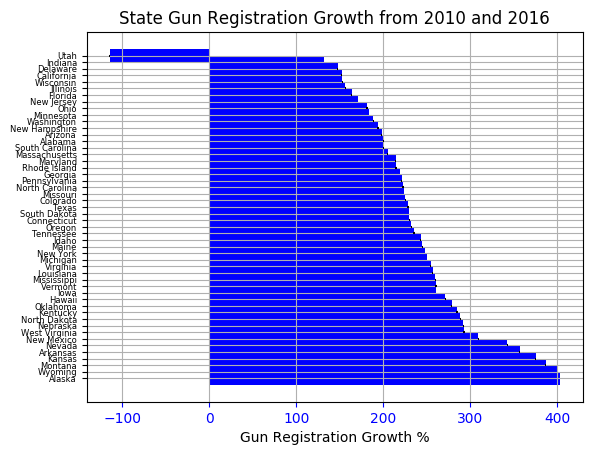

In [37]:
#Create bar chart to show gun growth rate by state
#Set the figure size 
plt.figure(figsize=(40,40))

plt.rcdefaults()
fig, ax = plt.subplots()

#Sort joined data by gun_growth value
sorted = joined_data.sort_values(by=['gun_growth'])

#create bar chart 
y_pos = np.arange(len(sorted['state']))
error = np.random.rand(len(sorted['state']))
ax.barh(y_pos, (sorted['gun_growth']*100), xerr=error, align='center',height=2,linewidth=5,color='blue', ecolor='black')

#set x and y axis lable and make the label readable
ax.set_yticks(y_pos)
ax.set_xlabel("Gun Registration Growth %")
ax.set_yticklabels(sorted['state'],size=6)

#Invert x and y axis
ax.invert_yaxis()  # labels read top-to-bottom

#Set tick colors:
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='black')

#Set the title
plt.title("State Gun Registration Growth from 2010 and 2016")     
plt.grid(True)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

To calculate the gun registration growth percentage between 2010 and 2016, the difference was taken and then mapped to a bar chart by state. Utah and Indiana are the only states that decreased while Alaska, Montana, Wyoming, Kansas and Arkansas increased by over 300%. It is impossible to compare the numbers of registration and permit checks between states but seen as a relative increase within each state it is clear that there is a national trend in increased checks. This of course does not include private transfers and may also be indicative of changes in data collection. Both of these questions require more research.

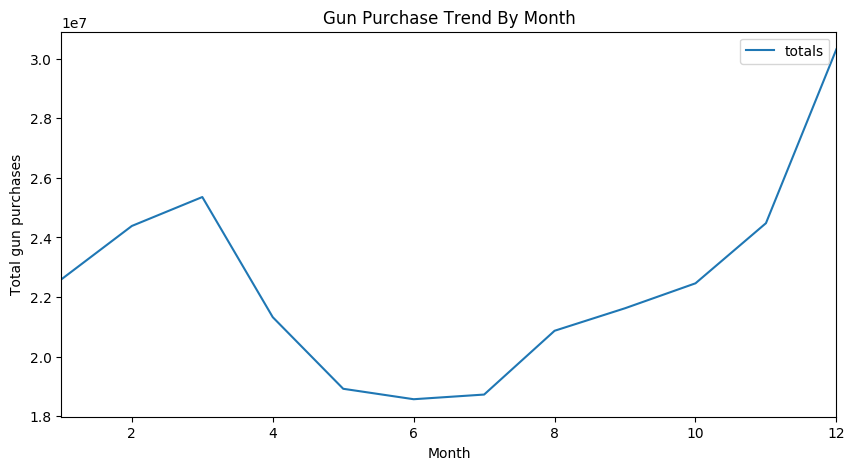

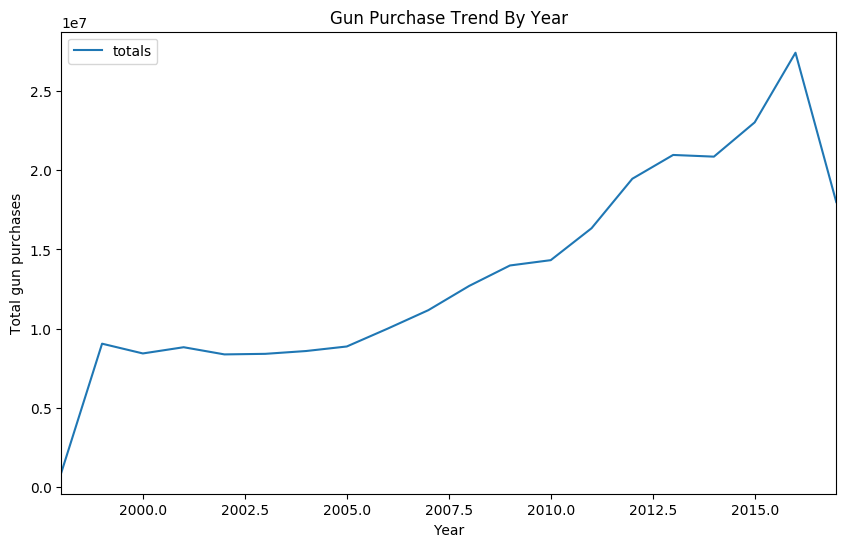

In [154]:
#Create line plot for gun purchase from 2010 to 2016 to observe the overall trend of gun ownership with attention to year and month data.

#1. Create line chart using grouped data by year- months
#during the season

#Assign figure size
plt.figure(figsize=(10,5))

dfgun.groupby('Month')['totals'].sum().plot(kind='line',sharex=True, sharey=True, layout = (2, 1))
#set axis lable names
plt.xlabel('Month')
plt.ylabel('Total gun purchases')
plt.legend()
plt.title("Gun Purchase Trend By Month")
plt.show()

#2. Create line chart using grouped data by year, which can be used to observe the change during the season
plt.figure(figsize=(10,6))
dfgun.groupby('Year')['totals'].sum().plot(kind='line')

plt.ylabel('Total gun purchases')
plt.xlabel('Year')
plt.title("Gun Purchase Trend By Year")
plt.legend()
plt.show()


When grouped by year there is a trend that suggest background permit checks are increasing. This may or may not correspond with increased gun ownership as it could also indicate changes in the permitting process. The month may be indicative of holiday season sales but these numbers can only hint at sales trends as they do not represent the many guns that are purchased without background checks. One study suggests that nearly 40 percent of gun purchases do not go through a background check (The Trace).

Source: https://www.thetrace.org/2015/10/private-sale-loophole-background-check-harvard-research/

<a id='conclusions'></a>

## Limitations

1. I chose not to estimate null or missing values across data sets. While differing state regulations make state to state comparisons impossible, my chose to not generalize this data would lead to additional confusion. Further descriptive statistics in this are purely exploratory and do not suggest a an accurate mean for example, as it has not been adjusted.


In [155]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0